   Hours_Studied  Passed
0              1       0
1              2       0
2              3       0
3              4       0
4              5       0
5              6       1
6              7       1
7              8       1
8              9       1
9             10       1


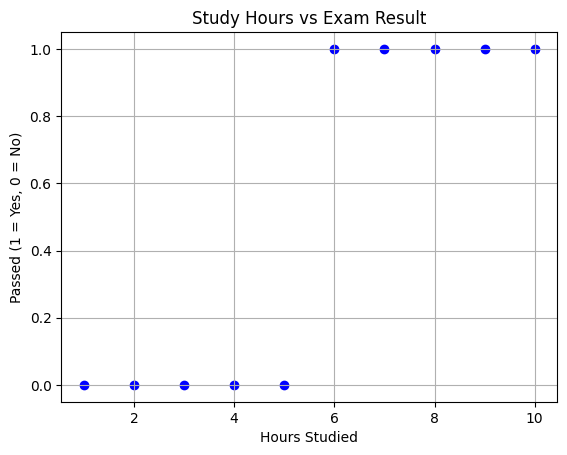

Training data size: 8
Testing data size: 2
Model training complete!
Accuracy: 1.00
Confusion Matrix:
[[1 0]
 [0 1]]


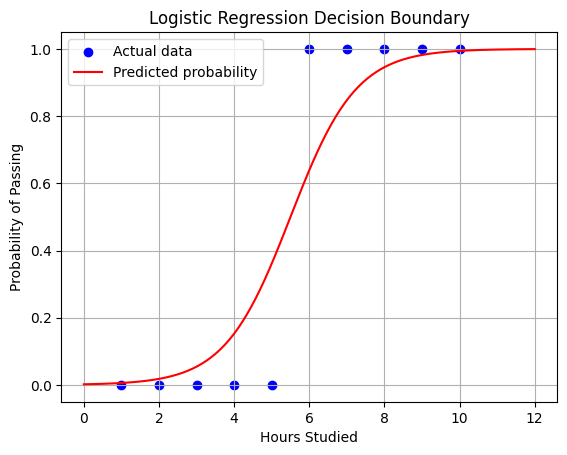

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Sample dataset: Hours studied vs pass/fail (1=pass, 0=fail)
data = {
    'Hours_Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Passed':        [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(data)
print(df)



plt.scatter(df['Hours_Studied'], df['Passed'], color='blue')
plt.xlabel('Hours Studied')
plt.ylabel('Passed (1 = Yes, 0 = No)')
plt.title('Study Hours vs Exam Result')
plt.grid(True)
plt.show()

# Features (X) and target (y)
X = df[['Hours_Studied']]  # 2D array
y = df['Passed']           # 1D array

# Split 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data size:", X_train.shape[0])
print("Testing data size:", X_test.shape[0])


# Create the Logistic Regression model
model = LogisticRegression()
# Train the model on training data
model.fit(X_train, y_train)
print("Model training complete!")


# Predict on the test set
y_pred = model.predict(X_test)

# Accuracy: percentage of correct predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix: how many true positives, false positives, etc.
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)



# Create a range of hours from 0 to 12
hours_range = np.linspace(0, 12, 300).reshape(-1, 1)

# Predict the probability of passing
#pass_prob = model.predict_proba(hours_range)[:, 1]  # Probability of class '1' (pass)
hours_range_df = pd.DataFrame(hours_range, columns=['Hours_Studied'])
pass_prob = model.predict_proba(hours_range_df)[:, 1]
plt.scatter(df['Hours_Studied'], df['Passed'], color='blue', label='Actual data')
plt.plot(hours_range, pass_prob, color='red', label='Predicted probability')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()

